In [1]:
MODEL_FLAGS="--image_size 256 --num_channels 128 --class_cond False --num_res_blocks 2 --num_heads 1 --learn_sigma True --use_scale_shift_norm False --attention_resolutions 16"
DIFFUSION_FLAGS="--diffusion_steps 1000 --noise_schedule linear --rescale_learned_sigmas False --rescale_timesteps False"
TRAIN_FLAGS="--lr 1e-4"

In [ ]:
!python scripts/segmentation_train.py --data_dir ./data/training $TRAIN_FLAGS $MODEL_FLAGS $DIFFUSION_FLAGS

In [5]:
!python scripts/segmentation_sample.py  --data_dir ./data/testing  --model_path ./results/savedmodel010000.pt --num_ensemble=3 $MODEL_FLAGS $DIFFUSION_FLAGS

^C


In [3]:
import torch
torch.cuda.empty_cache()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import os
import numpy as np
from PIL import Image

# Specify the input and output directories
input_directory = './../data/Mask/'
output_directory = './../data/Modified_Mask/'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# List all the .npy files in the input directory
npy_files = [f for f in os.listdir(input_directory) if f.endswith('.npy')]

# Iterate through the .npy files and save them as .png files
for npy_file in npy_files:
    # Load the numpy array
    numpy_array = np.load(os.path.join(input_directory, npy_file))

    # Convert the numpy array to a PIL image
    image = Image.fromarray((numpy_array * 255).astype('uint8'))

    width, height = image.size

    left = width * 0.125
    top = height * 0.125
    right = width * 0.875
    bottom = height * 0.875

    image = image.crop((left, top, right, bottom))
    image = image.resize((512, 512))

    # Save the image as a .png file with the same filename
    image.save(os.path.join(output_directory, os.path.splitext(npy_file)[0] + '.png'))

    # Close the image to free up resources
    image.close()

In [ ]:
# Specify the input and output directories
input_directory = './../data/Image/'
output_directory = './../data/Modified_Image/'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# List all the .npy files in the input directory
npy_files = [f for f in os.listdir(input_directory) if f.endswith('.npy')]

# Iterate through the .npy files and save them as .png files
for npy_file in npy_files:
    # Load the numpy array
    numpy_array = np.load(os.path.join(input_directory, npy_file))

    # Convert the numpy array to a PIL image
    image = Image.fromarray(((numpy_array - np.min(numpy_array)) / (np.max(numpy_array) - np.min(numpy_array)) * 255).astype(np.uint8))

    width, height = image.size

    left = width * 0.125
    top = height * 0.125
    right = width * 0.875
    bottom = height * 0.875

    image = image.crop((left, top, right, bottom))
    image = image.resize((512, 512))

    # Save the image as a .png file with the same filename
    image.save(os.path.join(output_directory, os.path.splitext(npy_file)[0] + '.png'))

    # Close the image to free up resources
    image.close()

In [5]:
import torch
from PIL import Image
import numpy as np

# Load a tensor from a file (e.g., in .pt or .npy format)
loaded_tensor = torch.load('./output/0002_NI000_slice000_output2').cpu()

# Convert the tensor to a NumPy array
tensor_as_array = loaded_tensor.numpy().squeeze()

# Normalize the array values to the range [0, 255] for image display
normalized_array = (tensor_as_array - tensor_as_array.min()) / (tensor_as_array.max() - tensor_as_array.min()) * 255

# Convert the NumPy array to an unsigned 8-bit integer type
uint8_array = normalized_array.astype(np.uint8)

# Create an image from the NumPy array
image = Image.fromarray(uint8_array)

# Save the image to a file (e.g., in .png format)
# image.save('output_image.png')

# Display the image
image.show()

In [4]:
import os
import torch

# Define the folder containing tensor files
folder_path = "./output"

# Create an empty list to store the loaded tensors
tensor_list = []

# Iterate through the files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Check if the file is a valid tensor file (e.g., .pt extension)
    if file_name:
        try:
            # Load the tensor using torch.load (you can use other methods)
            loaded_tensor = torch.load(file_path)
            tensor_list.append(loaded_tensor)
        except Exception as e:
            print(f"Error loading tensor from {file_name}: {str(e)}")

# Now, tensor_list contains all the loaded tensors


In [5]:
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms

def show_tensor_images(tensor_array, figsize=(10, 2), title=None, cmap='viridis', columns=6, num = 1):
    
    num_tensors = len(tensor_array)
    rows = (num_tensors + columns - 1) // columns
    fig, axes = plt.subplots(rows, columns, figsize=figsize)
    fig.subplots_adjust(wspace=0.1, hspace=0.2)

    to_pil = transforms.ToPILImage()
    
    if title:
        fig.suptitle(title, fontsize=12)
    
    for i, ax in enumerate(axes.flat):
        ax.axis('off')
        if i < num_tensors:
            tensor = tensor_array[i].squeeze().cpu()
            tensor = to_pil(tensor)
            ax.imshow(tensor, cmap=cmap)
            ax.set_title('Output'+str(i), fontsize=8)
    
    # Hide any empty subplots
    for i in range(num_tensors, rows * columns):
        fig.delaxes(axes.flatten()[i])
    
    plt.savefig('./output_images/output_figure'+str(num)+'.png')
    plt.show()


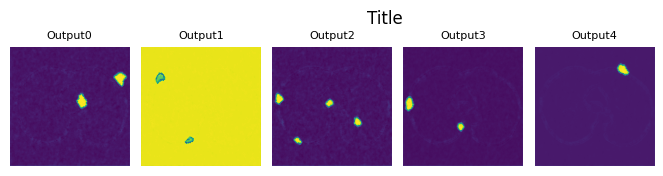

In [6]:
show_tensor_images(tensor_list, title='Title')

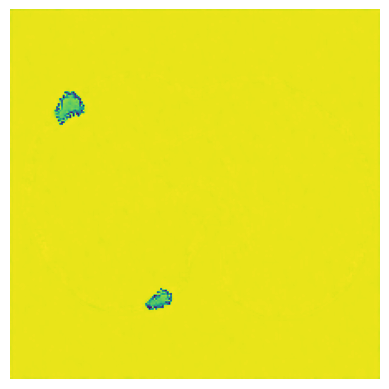

In [31]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Create a sample tensor (replace this with your tensor)
# In this example, we assume it's a 4-channel (e.g., RGBA) image
sample_tensor = tensor_list[1].squeeze().cpu()

# Define a transform to convert the tensor to an image
to_pil = transforms.ToPILImage()

# Convert the tensor to a PIL Image
image = to_pil(sample_tensor)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
from LIDCLoader import load_LIDC
ds = load_LIDC(image_size=224, combine_train_val=True, mode='Test')
datal= th.utils.data.DataLoader(
    ds,
    batch_size=1,
    shuffle=False)
data = iter(datal)